# This tutorial shows how to make and manipulate a power spectrum of two light curves using Stingray.

In [1]:
import numpy as np
from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
font_prop = font_manager.FontProperties(size=16)

# Power spectrum example
## 1. Create a light curve
There are two ways to make `Lightcurve` objects. We'll show one way here. Check out "Lightcurve/Lightcurve\ tutorial.ipynb" for more examples.

Generate an array of relative timestamps that's 8 seconds long, with dt = 0.03125 s, and make two signals in units of counts. The signal is a sine wave with amplitude = 300 cts/s, frequency = 2 Hz, phase offset = 0 radians, and mean = 1000 cts/s. We then add Poisson noise to the light curve.

In [2]:
dt = 0.03125  # seconds
exposure = 8.  # seconds
times = np.arange(0, exposure, dt)  # seconds

signal = 300 * np.sin(2.*np.pi*times/0.5) + 1000  # counts/s
noisy = np.random.poisson(signal*dt)  # counts

Now let's turn `noisy` into a `Lightcurve` object.

In [3]:
lc = Lightcurve(times, noisy)

Here we plot it to see what it looks like.

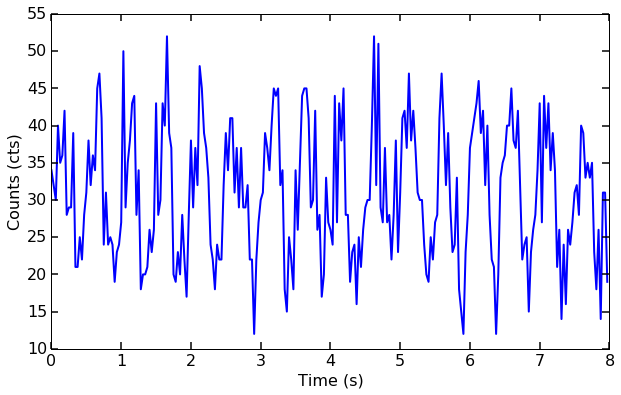

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(lc.time, lc.counts, lw=2, color='blue')
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
plt.show()

## 2. Pass the light curve to the `Powerspectrum` class to create a `Powerspectrum` object.
You can also specify the optional attribute `norm` if you wish to normalize power to squared fractional rms, Leahy, or squared absolute normalization. The default normalization is 'none'.

In [5]:
ps = Powerspectrum(lc)
print(ps)

Since the negative Fourier frequencies (and their associated powers) are discarded, the number of time bins per segment `n` is twice the length of `freq` and `power`.

In [6]:
print("\nSize of positive Fourier frequencies:", len(ps.freq))
print("Number of data points per segment:", ps.n)

('\nSize of positive Fourier frequencies:', 127)
('Number of data points per segment:', 256)


# Properties
A `Powerspectrum` object has the following properties :

1. `freq` : Numpy array of mid-bin frequencies that the Fourier transform samples.
2. `power` : Numpy array of the power spectrum.
3. `df` : The frequency resolution.
4. `m` : The number of power spectra averaged together. For a `Powerspectrum` of a single segment, `m=1`.
5. `n` : The number of data points (time bins) in one segment of the light curve.
6. `nphots1` : The total number of photons in the light curve.


In [7]:
print(ps.freq)
print(ps.power)
print(ps.df)
print(ps.m)
print(ps.n)
print(ps.nphots1)

[  0.125   0.25    0.375   0.5     0.625   0.75    0.875   1.      1.125
   1.25    1.375   1.5     1.625   1.75    1.875   2.      2.125   2.25
   2.375   2.5     2.625   2.75    2.875   3.      3.125   3.25    3.375
   3.5     3.625   3.75    3.875   4.      4.125   4.25    4.375   4.5
   4.625   4.75    4.875   5.      5.125   5.25    5.375   5.5     5.625
   5.75    5.875   6.      6.125   6.25    6.375   6.5     6.625   6.75
   6.875   7.      7.125   7.25    7.375   7.5     7.625   7.75    7.875
   8.      8.125   8.25    8.375   8.5     8.625   8.75    8.875   9.
   9.125   9.25    9.375   9.5     9.625   9.75    9.875  10.     10.125
  10.25   10.375  10.5    10.625  10.75   10.875  11.     11.125  11.25
  11.375  11.5    11.625  11.75   11.875  12.     12.125  12.25   12.375
  12.5    12.625  12.75   12.875  13.     13.125  13.25   13.375  13.5
  13.625  13.75   13.875  14.     14.125  14.25   14.375  14.5    14.625
  14.75   14.875  15.     15.125  15.25   15.375  15.5    15.

We can plot the power as a function of Fourier frequency. Notice how there's a spike at our signal frequency of 2 Hz!

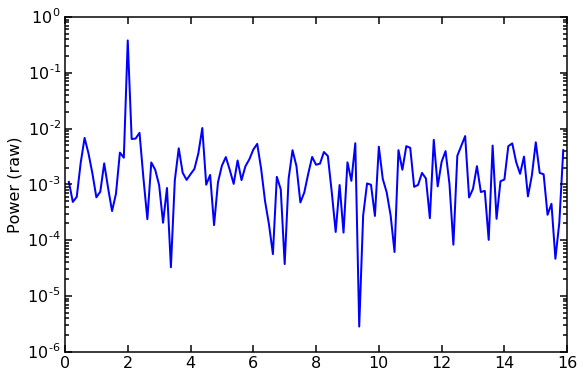

In [8]:
fig, ax1 = plt.subplots(1,1,figsize=(9,6), sharex=True)
ax1.plot(ps.freq, ps.power, lw=2, color='blue')
ax1.set_ylabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("Power (raw)", fontproperties=font_prop)
ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
plt.show()

You'll notice that the power spectrum is a bit noisy. This is because we're only using one segment of data. Let's try averaging together power spectra from multiple segments of data.
# Averaged power spectrum example
You could use a long `Lightcurve` and have `AveragedPowerspectrum` chop it into specified segments, or give a list of `Lightcurve`s where each segment of `Lightcurve` is the same length. We'll show the first way here.
## 1. Create a long light curve.
Generate an array of relative timestamps that's 1600 seconds long, and a signal in count units, with the same properties as the previous example. We then add Poisson noise and turn it into a `Lightcurve` object.

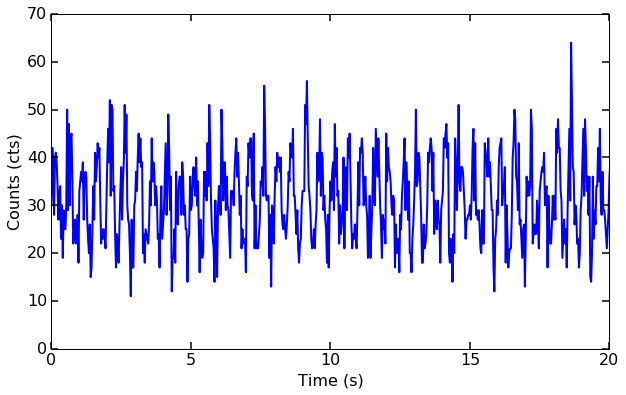

In [9]:
long_dt = 0.03125  # seconds
long_exposure = 1600.  # seconds
long_times = np.arange(0, long_exposure, long_dt)  # seconds

# In count rate units here
long_signal = 300 * np.sin(2.*np.pi*long_times/0.5) + 1000

# Multiply by dt to get count units, then add Poisson noise
long_noisy = np.random.poisson(long_signal*dt)

long_lc = Lightcurve(long_times, long_noisy)

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(long_lc.time, long_lc.counts, lw=2, color='blue')
ax.set_xlim(0,20)
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
plt.show()

## 2. Pass the light curve to the `AveragedPowerspectrum` class with a specified `segment_size`.
If the exposure (length) of the light curve cannot be divided by `segment_size` with a remainder of zero, the last incomplete segment is thrown out, to avoid signal artefacts. Here we're using 8 second segments.

In [14]:
avg_ps = AveragedPowerspectrum(long_lc, 8.)

We can check how many segments were averaged together by printing the `m` attribute.

In [15]:
print("Number of segments: %d" % avg_ps.m)

Number of segments: 200


`AveragedPowerspectrum` has the same properties as `Powerspectrum`, but with `m` $>$1.

Let's plot the averaged power spectrum!

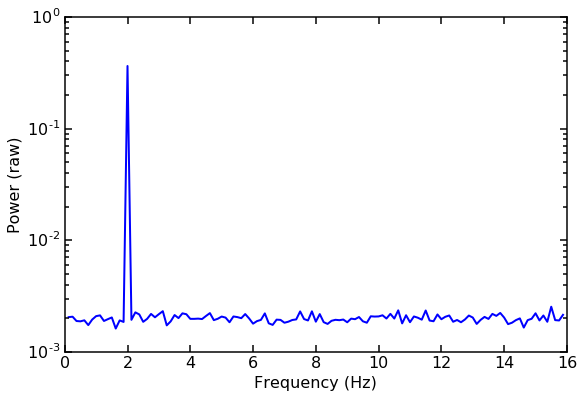

In [16]:
fig, ax1 = plt.subplots(1,1,figsize=(9,6))
ax1.plot(avg_ps.freq, avg_ps.power, lw=2, color='blue')
ax1.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("Power (raw)", fontproperties=font_prop)
ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
plt.show()

Now we'll show examples of all the things you can do with a `Powerspectrum` or `AveragedPowerspectrum` object using built-in stingray methods.

# Normalizating the power spectrum
The three kinds of normalization are:
* `leahy`: Leahy normalization. Makes the Poisson noise level $= 2$. See *Leahy et al. 1983, ApJ, 266, 160L*. 
* `frac`: Fractional rms-squared normalization, also known as rms normalization. Makes the Poisson noise level $= 2 / meanrate$. See *Belloni & Hasinger 1990, A&A, 227, L33*, and *Miyamoto et al. 1992, ApJ, 391, L21.*
* `abs`: Absolute rms-squared normalization, also known as absolute normalization. Makes the Poisson noise level $= 2 \times meanrate$. See *insert citation*.
* `none`: No normalization applied. This is the default.

In [17]:
avg_ps_leahy = AveragedPowerspectrum(long_lc, 8, norm='leahy')
avg_ps_frac = AveragedPowerspectrum(long_lc, 8., norm='frac')
avg_ps_abs = AveragedPowerspectrum(long_lc, 8., norm='abs')

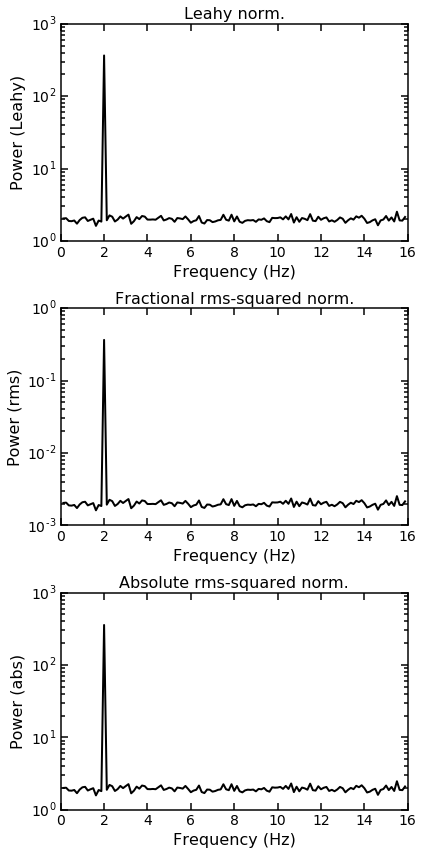

In [18]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1,figsize=(6,12))
ax1.plot(avg_ps_leahy.freq, avg_ps_leahy.power, lw=2, color='black')
ax1.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax1.set_ylabel("Power (Leahy)", fontproperties=font_prop)
ax1.set_yscale('log')
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
ax1.set_title("Leahy norm.", fontproperties=font_prop)
    
ax2.plot(avg_ps_frac.freq, avg_ps_frac.power, lw=2, color='black')
ax2.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax2.set_ylabel("Power (rms)", fontproperties=font_prop)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_yscale('log')
ax2.tick_params(which='major', width=1.5, length=7)
ax2.tick_params(which='minor', width=1.5, length=4)
ax2.set_title("Fractional rms-squared norm.", fontproperties=font_prop)

ax3.plot(avg_ps_abs.freq, avg_ps_abs.power, lw=2, color='black')
ax3.set_xlabel("Frequency (Hz)", fontproperties=font_prop)
ax3.set_ylabel("Power (abs)", fontproperties=font_prop)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.set_yscale('log')
ax3.tick_params(which='major', width=1.5, length=7)
ax3.tick_params(which='minor', width=1.5, length=4)
ax3.set_title("Absolute rms-squared norm.", fontproperties=font_prop)

for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_linewidth(1.5)
    ax3.spines[axis].set_linewidth(1.5)
plt.tight_layout()
plt.show()

# Re-binning a power spectrum in frequency
Typically, rebinning is done on an averaged, normalized power spectrum.
## 1. We can linearly re-bin a power spectrum
(although this is not done much in practice)

In [21]:
print("DF before:", avg_ps.df)
# Both of the following ways are allowed syntax:
# lin_rb_ps = Powerspectrum.rebin(avg_ps, 0.25, method='mean')
lin_rb_ps = avg_ps.rebin(0.25, method='mean')
print("DF after:", lin_rb_ps.df)

('DF before:', 0.125)


TypeError: __init__() takes at least 3 arguments (1 given)

## 2. And we can logarithmically/geometrically re-bin a power spectrum
In this re-binning, each bin size is 1+f times larger than the previous bin size, where `f` is user-specified and normally in the range 0.01-0.1. The default value is `f=0.01`.

In [22]:
# Both of the following ways are allowed syntax:
# log_rb_ps, log_rb_freq, binning = Powerspectrum.rebin_log(avg_ps, f=0.02)
log_rb_ps, log_rb_freq, binning = avg_ps.rebin_log(f=0.02)

Note that `rebin` returns a `Powerspectrum` or `AveragedPowerspectrum` object (depending on the input object), whereas `rebin_log` returns three `np.ndarray`s.

In [24]:
# print(type(lin_rb_ps))
print(type(log_rb_ps))
print(type(log_rb_freq))
print(type(binning))

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
